# Prueba Técnica Perfil Ingeniero de Datos Senior

Para la correcta elaboración de esta prueba debes tener una buena conexión a internet. La prueba está compuesta por 4 tareas; las cuales debes realizar y demostrar. Es importante que a medida que vayas desarrollando la prueba le expliques al entrevistador ¿Que estás haciendo? Y ¿Para qué?

*   Tener disponible tu IDE de preferencia
*   **Duración de la prueba 120MIN**
*  **Debes activar la cámara y compartir pantalla durante toda la prueba**
* **Una vez finalizado el codigo en python subirlo a un repositorio y compartirlo a technology@claroinsurance.com**





## Tarea 1. Analisis, diseño y normalización de BD

**Contexto del negocio:**

Claro es un broker de seguros que proporciona servicios a agencias y agentes de seguros, promoviendo su éxito en la venta de pólizas de seguros.


Una Agencia de seguros ***puede tener N niveles jerárquicos de agencias hijas asociadas***  (sub agencias); de las agencias se manejan datos como (nombre, dirección, nivel jerárquico, etc). Por su parte, las agencias tienen agentes de seguros quienes son los encargados de vender pólizas de seguros a los clientes finales. Se utilizan datos como: nombre cliente, teléfono, correo, número de póliza, tipo de póliza, fecha inicio y fin de la póliza, nivel póliza, carrier o aseguradora de la póliza, línea de negocio de la póliza, nombre del agente, teléfono del agente, NPN del agente, entre otros. Por otro lado, cada carrier o aseguradora puede operar con una o múltiples líneas de negocio y una línea de negocio puede ser ofrecida por uno o varios carriers. Las líneas de negocio son: BAC, vidas. dental y Sub. En el caso de carriers o aseguradoras existen muchas, entre las más famosas están: Javier, Oscar, Andres, cruz roja, Sura, entre otras. Cabe destacar que las pólizas son vendidas por un agente a un cliente y están vinculadas a un carrier o aseguradora  y una línea de negocio.


**Aspectos a evaluar:**


*   Diseñar un modelo datos en un diagrama de Entidad relación normalizado (3FN) (utilice la herramienta de su preferencia para crear el diagrama, se debe subir al repositorio)

*   Minimize redundancias en el modelo propuesto, que facilite la consulta y análisis de información; garantizando la consistencia de datos.

*  Contemple dentro del diseño;las entidades, atributos, cardinalidades y relaciones (identificar claves primarias y foráneas).
*  Proporcionar un modelo que sea escalable y facilite la incorporación de nuevos datos.

*   Explique cuántas tablas saldrían de la normalización de la base, de acuerdo al diagrama propuesto, explicando el propósito de cada tabla y su relacionamiento.


*   Describa cómo realizaría las siguientes consultas SQL para responder a estas preguntas :

       1.   Obtener todas las subagencias de una agencia raíz
       2.   Extraer las Pólizas por carrier y línea de negocio















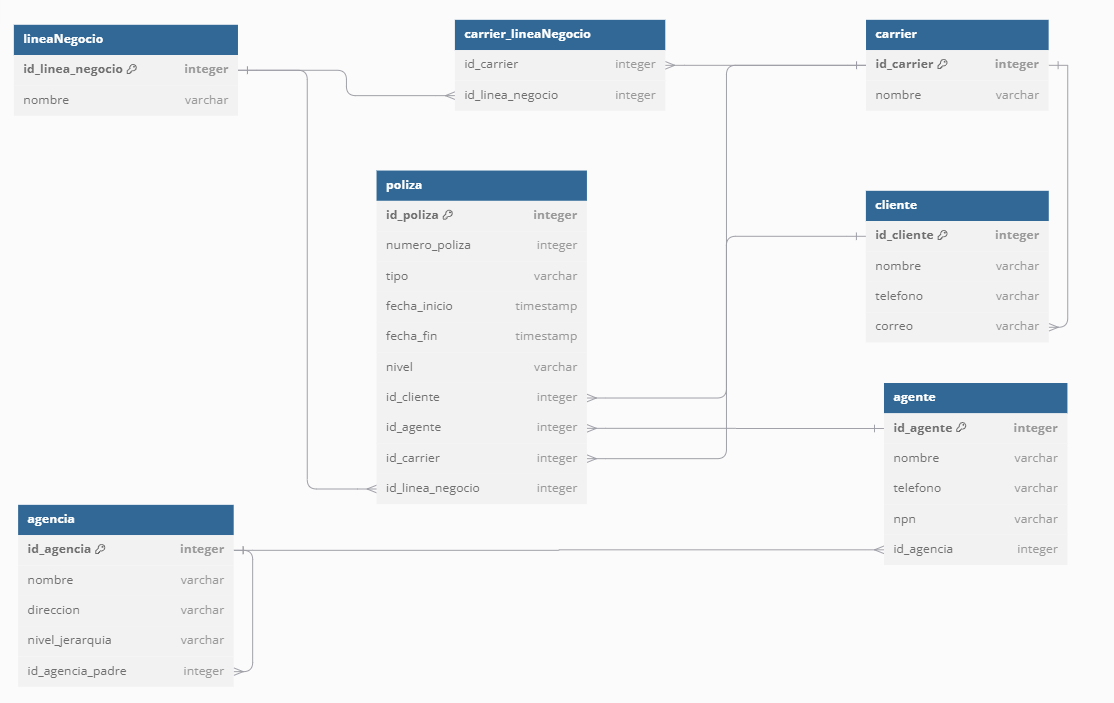

## Tarea 2: Integración de API

### Descripción:
Como Ingeniero de Datos Senior, se te asigna la tarea de extraer datos de una API pública, procesarlos y guardarlos en un formato tabular.

### Criterios de aceptación:
- Utiliza los siguientes endpoints de la API JSONPlaceholder:
  - [Usuarios](https://jsonplaceholder.typicode.com/users)
  - [Álbumes](https://jsonplaceholder.typicode.com/albums)
  - [Fotos](https://jsonplaceholder.typicode.com/photos)
- Transforma los datos JSON extraídos en un formato tabular.
- Agrega una nueva columna llamada `extraction_date` para registrar la fecha de extracción de los datos.
- Asegúrate de que todos los campos en los datos extraídos se guarden como tipo `STRING`.
- Guarda los datos en formato **Parquet**.
- Verifica el conteo de filas:
  - Tabla `Usuarios`: 10 registros
  - Tabla `Álbumes`: 100 registros
  - Tabla `Fotos`: 5000 registros.


In [10]:
from os import uname_result
import requests
import pandas as pd
from datetime import datetime
import pyarrow as pa
import pyarrow.parquet as pq

ENDPOINTS  = {
    "USUARIOS" : "https://jsonplaceholder.typicode.com/users",
    "ALBUMES" : "https://jsonplaceholder.typicode.com/albums",
    "FOTOS" : "https://jsonplaceholder.typicode.com/photos"
}

def  fecth_data (endpoint):
  response = requests.get(endpoint)
  if response.status_code == 200:
    return response.json()
  else:
    raise Exception(F"ERROR AL OBTENER DATOS DEL ENDPOINT {endpoint} : {response.status_code}")

def transform_to_dataframe (data, extraction_date):
  df = pd.DataFrame(data)
  df = df.astype(str)
  df['extraction_date']= extraction_date
  return df

def save_to_parquet (df,filename):
  table = pa.Table.from_pandas(df)
  pq.write_table(table, filename)

extraction_date = datetime.now().strftime('%Y-%m-%d')

usuarios_data = fecth_data(ENDPOINTS['USUARIOS'])
usuarios_dataframe = transform_to_dataframe (usuarios_data, extraction_date)


save_to_parquet(usuarios_dataframe, 'usuarios.parquet')
usuarios_dataframe.head(10)




,id,name,username,email,address,phone,website,company,extraction_date
0,1,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556',...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu...",2024-12-16
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"{'street': 'Victor Plains', 'suite': 'Suite 87...",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac...",2024-12-16
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"{'street': 'Douglas Extension', 'suite': 'Suit...",1-463-123-4447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': ...",2024-12-16
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"{'street': 'Hoeger Mall', 'suite': 'Apt. 692',...",493-170-9623 x156,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Mult...",2024-12-16
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"{'street': 'Skiles Walks', 'suite': 'Suite 351...",(254)954-1289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-c...",2024-12-16
5,6,Mrs. Dennis Schulist,Leopoldo_Corkery,Karley_Dach@jasper.info,"{'street': 'Norberto Crossing', 'suite': 'Apt....",1-477-935-8478 x6430,ola.org,"{'name': 'Considine-Lockman', 'catchPhrase': '...",2024-12-16
6,7,Kurtis Weissnat,Elwyn.Skiles,Telly.Hoeger@billy.biz,"{'street': 'Rex Trail', 'suite': 'Suite 280', ...",210.067.6132,elvis.io,"{'name': 'Johns Group', 'catchPhrase': 'Config...",2024-12-16
7,8,Nicholas Runolfsdottir V,Maxime_Nienow,Sherwood@rosamond.me,"{'street': 'Ellsworth Summit', 'suite': 'Suite...",586.493.6943 x140,jacynthe.com,"{'name': 'Abernathy Group', 'catchPhrase': 'Im...",2024-12-16
8,9,Glenna Reichert,Delphine,Chaim_McDermott@dana.io,"{'street': 'Dayna Park', 'suite': 'Suite 449',...",(775)976-6794 x41206,conrad.com,"{'name': 'Yost and Sons', 'catchPhrase': 'Swit...",2024-12-16
9,10,Clementina DuBuque,Moriah.Stanton,Rey.Padberg@karina.biz,"{'street': 'Kattie Turnpike', 'suite': 'Suite ...",024-648-3804,ambrose.net,"{'name': 'Hoeger LLC', 'catchPhrase': 'Central...",2024-12-16


## Tarea 3: Tarea de Transformación

### Notas:
Utiliza el archivo Parquet generado a partir de la tabla `Usuarios` en el paso de extracción.

### Descripción:
La columna `phone` en la tabla `Usuarios` contiene formatos inconsistentes. Limpia y transforma esta columna aplicando las siguientes reglas:

- **Regla 1**: Elimina todos los caracteres especiales del número de teléfono para que solo queden caracteres numéricos.  
  - **Ejemplo**: `210.067.6132 → 2100676132`
- **Regla 2**: Si un número de teléfono incluye una extensión (indicada por `x`), separa la extensión en una nueva columna llamada `ext`.  
  - **Ejemplo**: `586.493.6943 x140 → phone: 5864936943, ext: 140`

Guarda los datos limpios en un nuevo archivo Parquet.

### Criterios de aceptación:
- La columna `phone` está libre de caracteres especiales.
- Las extensiones se separan correctamente en la columna `ext`.
- La tabla final limpia se guarda en formato Parquet.

In [22]:
import re

usuarios_df = pd.read_parquet('usuarios.parquet')

def clean_phone(phone):
  match = re.search(r'x(\d+)', phone, re.IGNORECASE)
  if match:
    extension = match.group(1)
    cleaned_phone = re.sub(r'x.*','',phone, flags= re.IGNORECASE)
  else:
    extension = None
    cleaned_phone = phone
  cleaned_phone = re.sub(r'\D', '', cleaned_phone)
  return cleaned_phone, extension

usuarios_df [['phone','ext']] = usuarios_df['phone'].apply(lambda x: pd.Series(clean_phone(x)))

usuarios_df.to_parquet("usuarios_limpios.parquet",index= False)

usuarios_df.head(10)

,id,name,username,email,address,phone,website,company,extraction_date,ext
0,1,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556',...",17707368031,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu...",2024-12-16,56442
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"{'street': 'Victor Plains', 'suite': 'Suite 87...",0106926593,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac...",2024-12-16,09125
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"{'street': 'Douglas Extension', 'suite': 'Suit...",14631234447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': ...",2024-12-16,None
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"{'street': 'Hoeger Mall', 'suite': 'Apt. 692',...",4931709623,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Mult...",2024-12-16,156
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"{'street': 'Skiles Walks', 'suite': 'Suite 351...",2549541289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-c...",2024-12-16,None
5,6,Mrs. Dennis Schulist,Leopoldo_Corkery,Karley_Dach@jasper.info,"{'street': 'Norberto Crossing', 'suite': 'Apt....",14779358478,ola.org,"{'name': 'Considine-Lockman', 'catchPhrase': '...",2024-12-16,6430
6,7,Kurtis Weissnat,Elwyn.Skiles,Telly.Hoeger@billy.biz,"{'street': 'Rex Trail', 'suite': 'Suite 280', ...",2100676132,elvis.io,"{'name': 'Johns Group', 'catchPhrase': 'Config...",2024-12-16,None
7,8,Nicholas Runolfsdottir V,Maxime_Nienow,Sherwood@rosamond.me,"{'street': 'Ellsworth Summit', 'suite': 'Suite...",5864936943,jacynthe.com,"{'name': 'Abernathy Group', 'catchPhrase': 'Im...",2024-12-16,140
8,9,Glenna Reichert,Delphine,Chaim_McDermott@dana.io,"{'street': 'Dayna Park', 'suite': 'Suite 449',...",7759766794,conrad.com,"{'name': 'Yost and Sons', 'catchPhrase': 'Swit...",2024-12-16,41206
9,10,Clementina DuBuque,Moriah.Stanton,Rey.Padberg@karina.biz,"{'street': 'Kattie Turnpike', 'suite': 'Suite ...",0246483804,ambrose.net,"{'name': 'Hoeger LLC', 'catchPhrase': 'Central...",2024-12-16,None


## Tarea 4: Cargar Datos en una Solución en la Nube

### Descripción:
Como Ingeniero de Datos Senior, se te asigna la tarea de cargar la tabla `users_df` limpia del paso de transformación en una solución de almacenamiento de datos basada en la nube, específicamente Google BigQuery.

### Criterios de aceptación:
- Escribe pseudocódigo para cargar el archivo `users_cleaned.parquet` en una tabla de BigQuery.
- Incluye comentarios detallados que expliquen:
  - Los pasos necesarios para configurar el acceso a BigQuery (por ejemplo, configuración de credenciales de cuenta de servicio).
  - Cómo crear un conjunto de datos y una tabla en BigQuery.
- El pseudocódigo debe incluir:
  - Cargar el archivo Parquet en una tabla de BigQuery.
  - Verificar la carga imprimiendo un mensaje de éxito o manejando errores.


In [ ]:
## Tu Respuesta